# Practical case - Mammals

In this practical case, we have to segment the mammals according to the constituents of its milk. For that, we have the `mammals.csv` file which contains a mammals list with the constituents of its milk.

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Load data

In [2]:
import pandas as pd

In [3]:
# Load data from data/ folder
mammals = pd.read_csv('data/mammals.csv', sep = ',')
mammals.head()

,name,water,protein,fat,lactose,ash
0,Horse,90.1,2.6,1.0,6.9,0.35
1,Orangutan,88.5,1.4,3.5,6.0,0.24
2,Monkey,88.4,2.2,2.7,6.4,0.18
3,Donkey,90.3,1.7,1.4,6.2,0.40
4,Hippo,90.4,0.6,4.5,4.4,0.10


For make the segmentation, we do not need the `name` column. For that, let's remove this column of the data:

In [4]:
col_names = list(mammals.columns)
col_names.remove('name')

data = mammals[col_names]
data.head()

,water,protein,fat,lactose,ash
0,90.1,2.6,1.0,6.9,0.35
1,88.5,1.4,3.5,6.0,0.24
2,88.4,2.2,2.7,6.4,0.18
3,90.3,1.7,1.4,6.2,0.40
4,90.4,0.6,4.5,4.4,0.10


Due to there are more of two dimensions, for selecting the number of clusters, we have to use the Silhouette method:

In [5]:
# blobs       -> data
# figure_name -> figure name
# max_k       -> maximum of clusters
# n_init      -> maximum number which the algorithm will be executed
def plot_silhouette(blobs, figure_name, max_k = 10, n_init = 10):
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans
    #from sklearn.spatial.distance import cdist
    
    silhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        silhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), silhouette_avgs)
    xlabel('k')
    title(figure_name)

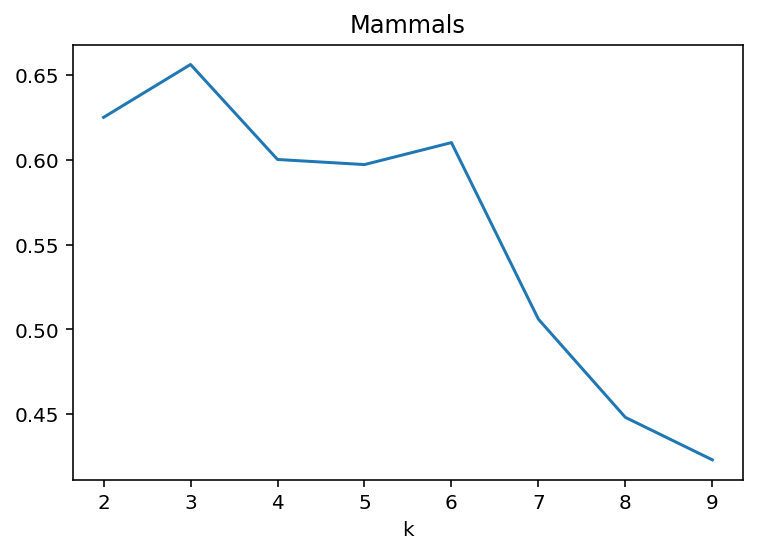

In [6]:
plot_silhouette(data, 'Mammals')

With this result, we can say that the optimal number of cluster is 2. So, we are going to use `KMeans` with 2 clusters:

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Create KMeans
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 1).fit(data)

# Let's predict the cluster in which belong the mammals
clusters = kmeans.predict(data)

# Print the cluster of each mammals
for c in range(max(clusters) + 1) :
    print('Cluster', c)
    print(mammals['name'][clusters == c])
    print('\n')

Cluster 0
0          Horse
1      Orangutan
2         Monkey
3         Donkey
4          Hippo
5          Camel
6          Bison
7        Buffalo
8     Guinea Pig
9            Cat
10           Fox
11         Llama
12          Mule
13           Pig
14         Zebra
15         Sheep
Name: name, dtype: object


Cluster 1
16         Dog
17    Elephant
18      Rabbit
19         Rat
20        Deer
21    Reindeer
22       Whale
Name: name, dtype: object


Cluster 2
23       Seal
24    Dolphin
Name: name, dtype: object


